# Survival Analysis of Titanic by Arjun.

In [2]:
#Importing required libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pandas as pd
print(pd.__version__)

import os


0.18.1


### Reading Titanic Train and Test Datasets! 

In [47]:
#Reading Titanic Train and Test Datasets! 

titanic_train = pd.read_csv("C:/Users/arjun/Desktop/train.csv")

titanic_test = pd.read_csv("C:/Users/arjun/Desktop/test.csv")

In [7]:
titanic_train.shape 

(891, 12)

In [8]:
titanic_test.shape

(418, 11)

In [9]:


titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Variable Description​¶
# Header Name	Descriptions
# Survived	Survival (0 = No; 1 = Yes)
# Pclass	Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name	Name
# Sex	Sex
# Age	Age
# SibSp	Number of Siblings/Spouses Aboard
# Parch	Number of Parents/Children​ Aboard
# Ticket	Ticket Number
# Fare	Passenger Fare
# Cabin	Cabin
# Embarked	Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [11]:
print(titanic_train.head(6))
# Checking the first 6 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

In [12]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
titanic_train.describe()

C:\Users\arjun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
titanic_train.isnull().sum()
#gives sum of all null values, i.e; age=177 missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# droping unnecessary columns, which won't be useful in analysis and prediction

titanic_train = titanic_train.drop(['Name','Ticket', 'Cabin'] ,axis=1)
titanic_test = titanic_test.drop(['Name','Ticket'], axis=1)

In [18]:
titanic_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [19]:
#del titanic_train["Cabin"] 

In [20]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


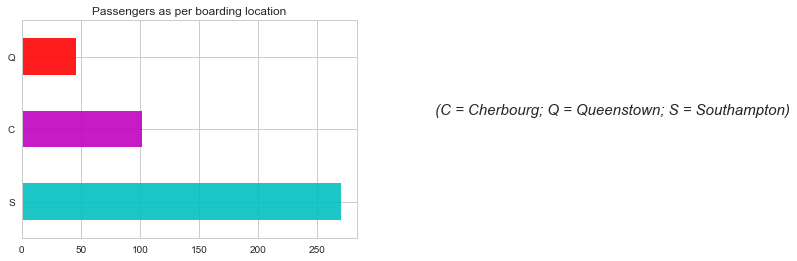

In [21]:
#Embarkment_1



#Embarkment count as per boarding place!
titanic_test.Embarked.value_counts().plot(color='cmr',kind='barh', alpha=0.89)
plt.title("Passengers as per boarding location")
plt.text(350, 1.2, '(C = Cherbourg; Q = Queenstown; S = Southampton)', style='italic',fontsize=15)

Lets analyse Embarkment now!


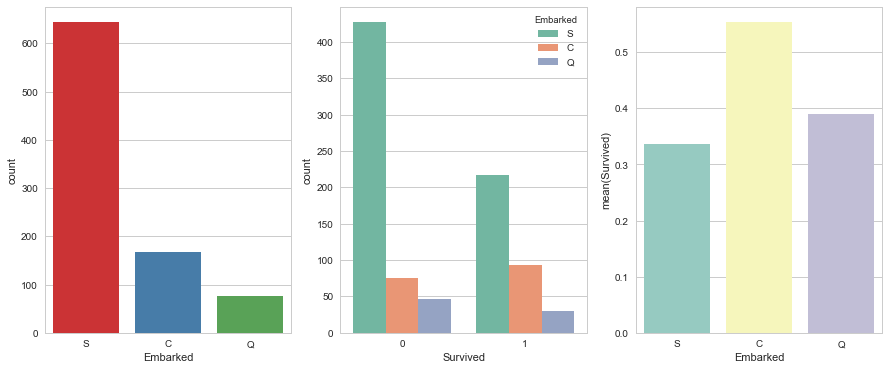

In [22]:
#Embarkmet_2

print('Lets analyse Embarkment now!')

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,6))


sns.countplot(x='Embarked', data=titanic_train, ax=axis1,  palette="Set1")
sns.countplot(x='Survived', hue="Embarked", data=titanic_train, order=[0,1], ax=axis2, palette="Set2")


# **group by embarked, and get the mean for survived passengers for each value in Embarked**
embark_class = titanic_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_class, order=['S','C','Q'],ax=axis3, palette="Set3")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9A5047F28>]], dtype=object)

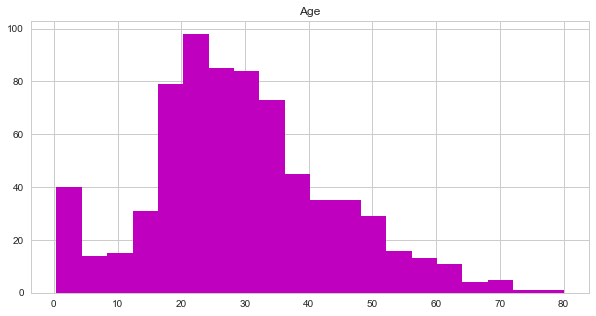

In [23]:
#Age_1 

#Before modifying age NaN values!


#as the Age has migging values, lets see a histogram to understand the pattern with age.

titanic_train.hist(column='Age', figsize=(10,5), bins = 20, color='m')



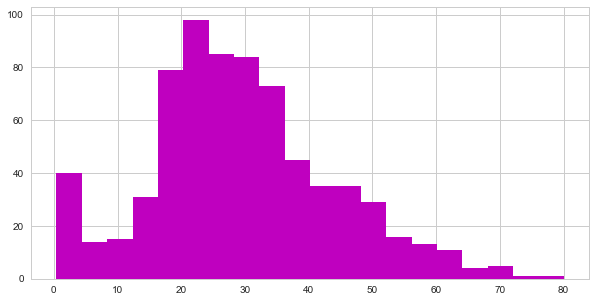

In [24]:
fig, (axis1) = plt.subplots(1,figsize=(10,5))
titanic_train['Age'].hist(bins=20, ax=axis1, color='m')

In [25]:
# fig, (axis1) = plt.subplots(1,figsize=(15,4))
# titanic_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1, color='m')

In [26]:
#Age_2

print('From this histogram, we deduce that ages between 20 and 30 are in more number, so filling by median wouldnt make huge difference.')

titanic_train["Age"].describe()

From this histogram, we deduce that ages between 20 and 30 are in more number, so filling by median wouldnt make huge difference.


C:\Users\arjun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [27]:
#Age_2.1

titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

titanic_train.isnull().sum()
# replacing the null values with the median age which is more robust to outliers than the mean.

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9A571D0F0>]], dtype=object)

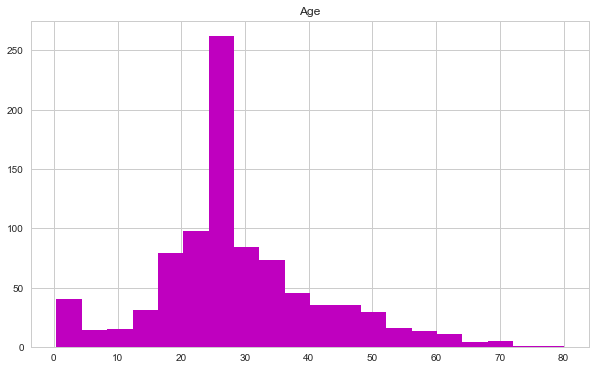

In [28]:
#Age_3 

#After modifying age NaN values!

titanic_train.hist(column='Age', figsize=(10,6), bins = 20,color='m' )

C:\Users\arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


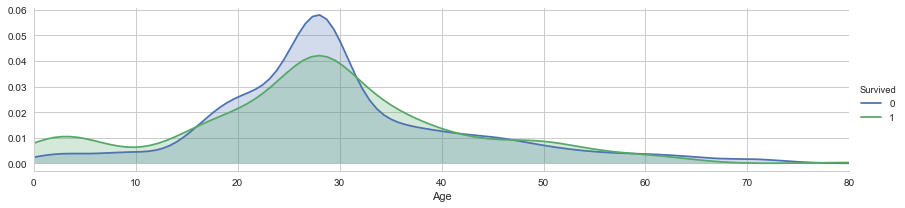

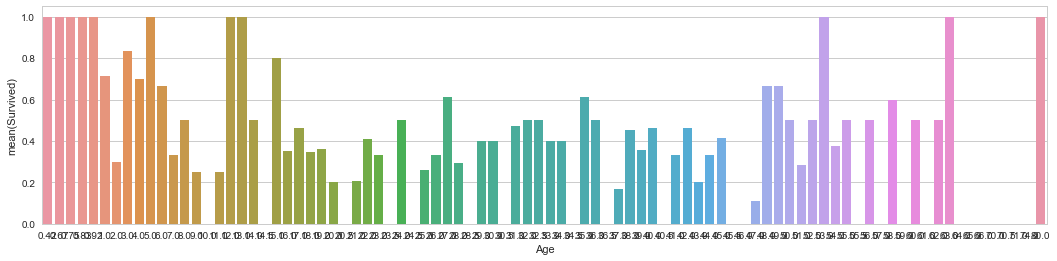

In [29]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_train['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
avg_age = titanic_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=avg_age)

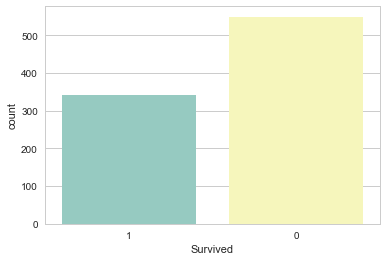

In [30]:
# Survival Count.

sns.countplot(x="Survived", order=[1,0], data=titanic_train, palette="Set3")
## print('Survived')


## Passenger Class Analysis!

In [31]:
#Pclass_1

print('Pclass: class played crucial role in survival, lets see which class survied the most? ')
print('Lets check the mean.')

titanic_train['Survived'].groupby(titanic_train['Pclass']).mean()


Pclass: class played crucial role in survival, lets see which class survied the most? 
Lets check the mean.


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

This shows half of the people are from 3rd class


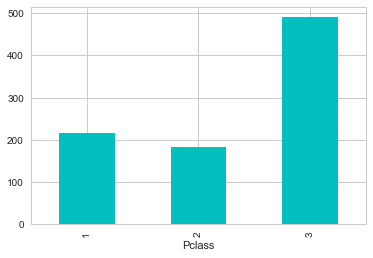

In [32]:
#Pclass_2


#**Pclass passengers count**

Gp1= titanic_train.groupby('Pclass').PassengerId.count()
Gp1.plot(kind='bar', color='c', alpha=0.99)

print('This shows half of the people are from 3rd class')

Pclass: Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)


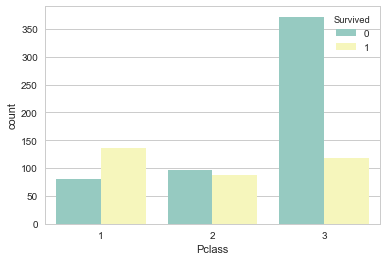

In [33]:
#Pclass_3


#Pclass survival plot.

sns.countplot(titanic_train['Pclass'], hue= titanic_train['Survived'], palette='Set3')

# fig, (axis2) = plt.subplots(10,figsize=(5,20))
print('Pclass: Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)')

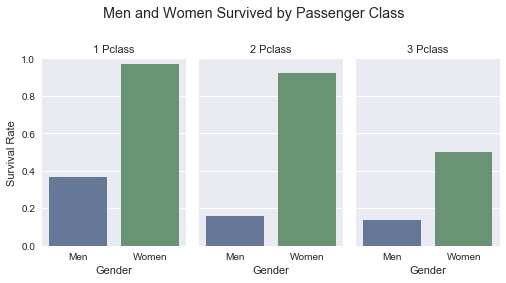

In [34]:
sns.set(font_scale=1)
c = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic_train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(c.set_axis_labels("Gender", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
c.fig.suptitle('Men and Women Survived by Passenger Class')

## Family

In [35]:
#Family 



#Lets combine Parch and SibSp to make one column as Family.

#This is to analyse if having family member will increase the survival chances or not.!


titanic_train['Family']= titanic_train["Parch"] + titanic_train["SibSp"]
titanic_train['Family'].loc[titanic_train['Family'] > 0 ] = 1
titanic_train['Family'].loc[titanic_train['Family'] > 0 ] == 0

titanic_test['Family']= titanic_test["Parch"] + titanic_test["SibSp"]
titanic_test['Family'].loc[titanic_test['Family'] > 0 ] = 1
titanic_test['Family'].loc[titanic_test['Family'] > 0 ] == 0


# Drop Parch and SibSp
titanic_train= titanic_train.drop(['SibSp', 'Parch'], axis=1)
titanic_test= titanic_test.drop(['SibSp', 'Parch'], axis=1)



#Average of those dont have family member

family_stat= titanic_train[["Family", "Survived"]].groupby(['Family'], as_index=False).mean()





# #Plot

# fig, (axis1,axis2) = plt.subplots(1,2,sharex=True, figsize=(10,6))

# sns.countplot(x='Family', data=titanic_train, order=[1,0], ax=axis1)

C:\Users\arjun\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


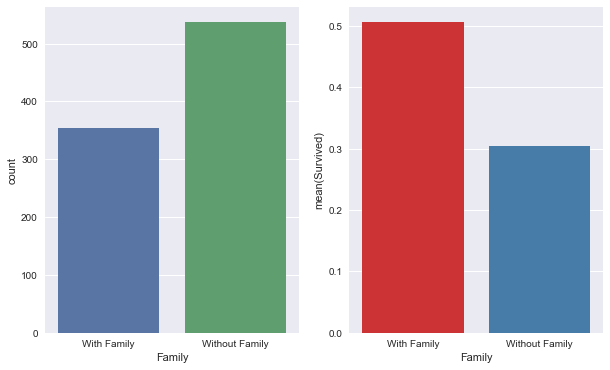

In [36]:
#Plot

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True, figsize=(10,6))

sns.countplot(x='Family', data=titanic_train, order=[1,0], ax=axis1)

sns.barplot(x= 'Family', y='Survived', data=family_stat, order=[1,0], ax= axis2, palette='Set1')

axis1.set_xticklabels(["With Family", "Without Family"], rotation=0)


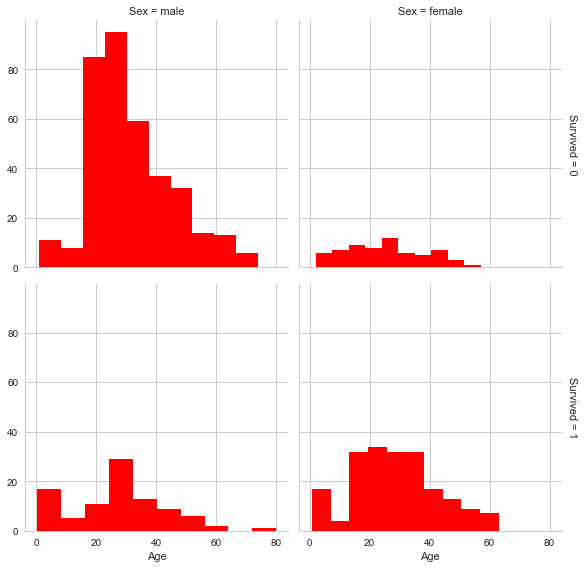

In [114]:
s = sns.FacetGrid(titanic_train, size=4,col="Sex", row="Survived", margin_titles=True)
s.map(plt.hist, "Age",color="r")

### By Viewing the Histagram above we can have relation between survial based on Age and Gender!

#### It is understood that Female survival rate is more that Men for the age group between 25-30. 

#### Females in between the age 25-30  have more survival rate!

### Correlation between fare and survival
### Bubble size =  no, of people in that group

Line2D(_line0)
Legend


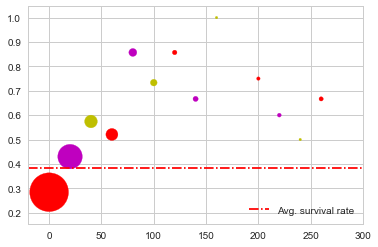

In [54]:
total_passengers = titanic_train['Survived'].count()
survived_passengers = titanic_train['Survived'].sum()
survived_ratio = survived_passengers/total_passengers

def avg_survived(survived_ratio):
    print(plt.axhline(y=survived_ratio,ls="-.", c='r'))
    print(plt.legend(['Avg. survival rate'],loc=4))



fare_range = np.arange(0,300,20)
fare_groups = pd.cut(titanic_train['Fare'], fare_range)
grouped_fare = titanic_train.groupby(fare_groups)['Survived'].mean()



# count()*3 -> just to make the bubble size bigger
num_people_fare_groups = titanic_train.groupby(fare_groups)['Survived'].count()*3
plt.scatter(fare_range[:len(fare_range)-1], grouped_fare, s=num_people_fare_groups.tolist(),color='rmy')
plt.xlim(-20,300)
avg_survived(survived_ratio)

In [51]:
print (max(titanic_train["Fare"]))

512.3292


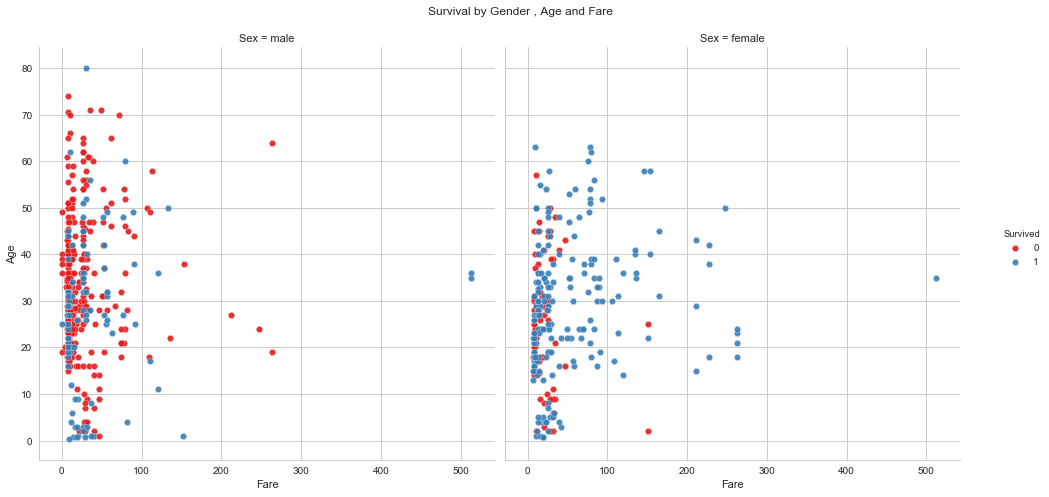

In [119]:
g = sns.FacetGrid(titanic_train, hue="Survived",size=7, col="Sex", margin_titles=True,
                palette="Set1")
g.map(plt.scatter, "Fare", "Age",marker='H', edgecolor="w",alpha=.9).add_legend()
plt.subplots_adjust(top=.9)
g.fig.suptitle('Survival by Gender , Age and Fare')



# gf= sns.FaceGrid(titanic_train, hue= "Survived", size=4, col= "Sex", margin_titles=True, palette="Set3")


In [120]:
print('HI')

HI
